#Group 13 - Machine Learning Approaches for Analyzing Bank Customers Complaints

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# file_path = '/content/drive/My Drive/Complaints/Dataset Bank 2021-2024.csv'
file_path = '/content/drive/My Drive/Dataset Bank 2021-2024.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,NaN,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,NaN,8423775
2,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435
3,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,NaN,"EQUIFAX, INC.",GA,30213,NaN,Consent provided,Web,2024-01-26,Closed with explanation,Yes,NaN,8231458
4,2024-01-18,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,XXXX XXXX XXXX XXXX XXXX XXXX XXXX - XXXX Acco...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,752XX,NaN,Consent provided,Web,2024-01-18,Closed with non-monetary relief,Yes,NaN,8179637


In [ ]:
df.shape

(3239453, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239453 entries, 0 to 3239452
Data columns (total 18 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 object 
 1   Product                       object 
 2   Sub-product                   object 
 3   Issue                         object 
 4   Sub-issue                     object 
 5   Consumer complaint narrative  object 
 6   Company public response       object 
 7   Company                       object 
 8   State                         object 
 9   ZIP code                      object 
 10  Tags                          object 
 11  Consumer consent provided?    object 
 12  Submitted via                 object 
 13  Date sent to company          object 
 14  Company response to consumer  object 
 15  Timely response?              object 
 16  Consumer disputed?            float64
 17  Complaint ID                  int64  
dtypes: float64(1), int64(1

In [ ]:
df.dropna(subset=('Consumer complaint narrative'), inplace=True)

In [ ]:
df = df[['Product', 'Consumer complaint narrative']]

In [ ]:
df['Product'].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    567716
Credit reporting or other personal consumer reports                             208140
Debt collection                                                                 112806
Checking or savings account                                                      64356
Credit card or prepaid card                                                      59394
Mortgage                                                                         42116
Money transfer, virtual currency, or money service                               26271
Credit card                                                                      20767
Vehicle loan or lease                                                            18086
Student loan                                                                     14450
Payday loan, title loan, or personal loan                                         8426
Payday loan, title loan, personal l

In [ ]:
class_mapping = {
    'Payday loan, title loan, or personal loan': 'Loans and Mortgages',
    'Payday loan, title loan, personal loan, or advance loan': 'Loans and Mortgages',
    'Student loan': 'Loans and Mortgages',
    'Vehicle loan or lease': 'Loans and Mortgages',
    'Mortgage': 'Loans and Mortgages',
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Reporting and Consumer Reports',
    'Credit reporting or other personal consumer reports': 'Credit Reporting and Consumer Reports',
    'Debt collection': 'Debt and Credit Management',
    'Debt or credit management': 'Debt and Credit Management',
    'Credit card or prepaid card': 'Credit and Prepaid Cards',
    'Credit card': 'Credit and Prepaid Cards',
    'Prepaid card': 'Credit and Prepaid Cards',
    'Checking or savings account': 'Bank Accounts',
    'Money transfer, virtual currency, or money service': 'Money Services'
}

# Replace old classes with new class
df['Product'] = df['Product'].replace(class_mapping)

In [ ]:
df['Product'].value_counts()

Product
Credit Reporting and Consumer Reports    775856
Debt and Credit Management               113367
Loans and Mortgages                       85519
Credit and Prepaid Cards                  82387
Bank Accounts                             64356
Money Services                            26271
Name: count, dtype: int64

In [ ]:
color_palette = ["#220901", "#621708", "#941b0c", "#bc3908", "#f6aa1c", "#a6aa1c"]

sb.countplot(x='Product', hue='Product', data=df, palette=color_palette, legend=False)

# Customize the plot
plt.title('Distribution of Complaints by Product Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.drop_duplicates(subset=['Consumer complaint narrative'], inplace=True)

In [ ]:
df.shape

(870556, 2)

In [ ]:
df['Product'].value_counts()

Product
Credit Reporting and Consumer Reports    516300
Debt and Credit Management               104604
Loans and Mortgages                       85070
Credit and Prepaid Cards                  74331
Bank Accounts                             64281
Money Services                            25970
Name: count, dtype: int64

In [ ]:
resampled_df = pd.DataFrame(columns=df.columns)

target_count = 10000

for product in df['Product'].unique():
  product_subset = df[df['Product'] == product].sample(target_count)
  resampled_df = pd.concat([resampled_df, product_subset])

# Reset index
resampled_df.reset_index(drop=True, inplace=True)

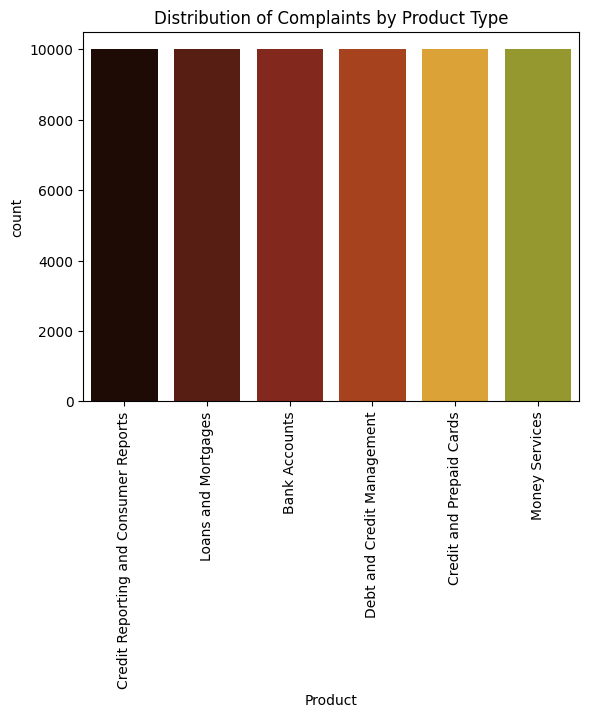

In [ ]:
color_palette = ["#220901", "#621708", "#941b0c", "#bc3908", "#f6aa1c", "#a6aa1c"]

sb.countplot(x='Product', hue='Product', data=resampled_df, palette=color_palette, legend=False)

# Customize the plot
plt.title('Distribution of Complaints by Product Type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       60000 non-null  object
 1   Consumer complaint narrative  60000 non-null  object
dtypes: object(2)
memory usage: 937.6+ KB


In [ ]:
resampled_df.head(10)

,Product,Consumer complaint narrative
0,Credit Reporting and Consumer Reports,Hi I am submitting this XXXX XXXX without any ...
1,Credit Reporting and Consumer Reports,In accordance with the Fair Credit Reporting a...
2,Credit Reporting and Consumer Reports,I reviewed my Consumer Reports and noticed tha...
3,Credit Reporting and Consumer Reports,This is my several endeavor to tell you that I...
4,Credit Reporting and Consumer Reports,I have been submitting letters since XX/XX/XXX...
5,Credit Reporting and Consumer Reports,I did not give this company permission to view...
6,Credit Reporting and Consumer Reports,In accordance with the Fair Credit Reporting A...
7,Credit Reporting and Consumer Reports,In accordance with the Fair Credit Reporting a...
8,Credit Reporting and Consumer Reports,I am writing to express my concern about the i...
9,Credit Reporting and Consumer Reports,This is my NUMEROUS request that I have been a...


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c', 'and', 'I', 'A', 'And', 'So', 'arnt', 'This', 'When', 'It', 'many', 'Many', 'so', 'cant', 'Yes', 'yes', 'No', 'no', 'These', 'these']
stop_words = stop_words + more_stopwords

def text_preprocessing(text):
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\w*xx+\w*', '', text)
    return text

def remove_stopwords(text):
    clean = [word for word in text.split() if word not in stop_words]
    final_text = ' '.join(clean)
    return final_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# applying preprocessing functions
clean_df = resampled_df.copy()
clean_df['Consumer complaint narrative'] = clean_df['Consumer complaint narrative'].apply(text_preprocessing).apply(remove_stopwords)

# label encoding
le = LabelEncoder()
clean_df['encoded_product'] = le.fit_transform(clean_df['Product'])

In [ ]:
clean_df.head()

,Product,Consumer complaint narrative,encoded_product
0,Credit Reporting and Consumer Reports,writing express deep dissatisfaction frustrati...,1
1,Credit Reporting and Consumer Reports,according usc experian shall free charge condu...,1
2,Credit Reporting and Consumer Reports,final letter concerning fraud accounts account...,1
3,Credit Reporting and Consumer Reports,public record information bankruptcy chapter d...,1
4,Credit Reporting and Consumer Reports,upon reviewing updates incorrect information s...,1


## Testing Models

In [ ]:
from sklearn.model_selection import train_test_split

X = clean_df['Consumer complaint narrative']
Y = clean_df['Product']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

# MNB

Accuracy: 0.78
Classification Report:
                                        precision    recall  f1-score   support

                        Bank Accounts      0.696     0.819     0.752      2000
Credit Reporting and Consumer Reports      0.767     0.802     0.784      2000
             Credit and Prepaid Cards      0.753     0.734     0.743      2000
           Debt and Credit Management      0.802     0.708     0.752      2000
                  Loans and Mortgages      0.818     0.843     0.830      2000
                       Money Services      0.844     0.752     0.795      2000

                             accuracy                          0.776     12000
                            macro avg      0.780     0.776     0.776     12000
                         weighted avg      0.780     0.776     0.776     12000



In [ ]:
from sklearn.linear_model import SGDClassifier

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
pipeline = make_pipeline(TfidfVectorizer(), SGDClassifier())

# Train the model
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

# SGDC

Accuracy: 0.81
Classification Report:
                                        precision    recall  f1-score   support

                        Bank Accounts       0.76      0.79      0.78      2000
Credit Reporting and Consumer Reports       0.81      0.83      0.82      2000
             Credit and Prepaid Cards       0.80      0.81      0.80      2000
           Debt and Credit Management       0.83      0.79      0.81      2000
                  Loans and Mortgages       0.85      0.86      0.86      2000
                       Money Services       0.83      0.80      0.81      2000

                             accuracy                           0.81     12000
                            macro avg       0.81      0.81      0.81     12000
                         weighted avg       0.81      0.81      0.81     12000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Train the model
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

# RFC

Accuracy: 0.79
Classification Report:
                                        precision    recall  f1-score   support

                        Bank Accounts       0.73      0.77      0.75      2000
Credit Reporting and Consumer Reports       0.81      0.83      0.82      2000
             Credit and Prepaid Cards       0.78      0.75      0.76      2000
           Debt and Credit Management       0.80      0.78      0.79      2000
                  Loans and Mortgages       0.84      0.85      0.84      2000
                       Money Services       0.81      0.78      0.79      2000

                             accuracy                           0.79     12000
                            macro avg       0.79      0.79      0.79     12000
                         weighted avg       0.79      0.79      0.79     12000



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a TF-IDF vectorizer and LogisticRegression classifier
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Train the model
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

# LGR

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.82
Classification Report:
                                        precision    recall  f1-score   support

                        Bank Accounts       0.77      0.79      0.78      2000
Credit Reporting and Consumer Reports       0.83      0.83      0.83      2000
             Credit and Prepaid Cards       0.79      0.81      0.80      2000
           Debt and Credit Management       0.82      0.80      0.81      2000
                  Loans and Mortgages       0.85      0.86      0.86      2000
                       Money Services       0.83      0.81      0.82      2000

                             accuracy                           0.82     12000
                            macro avg       0.82      0.82      0.82     12000
                         weighted avg       0.82      0.82      0.82     12000



## Hyperparameter Tuning

MNB Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'tfidfvectorizer__max_df': [0.75, 1.0],
    'tfidfvectorizer__min_df': [1, 2],
    'tfidfvectorizer__use_idf': [True, False],
    'multinomialnb__alpha': [0.1, 0.5, 1.0],
    'multinomialnb__fit_prior': [True, False]
}

pipeline1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline1, param_grid_nb, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# MNB Tuning

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Accuracy: 0.80
Best Parameters: {'multinomialnb__alpha': 0.1, 'multinomialnb__fit_prior': True, 'tfidfvectorizer__max_df': 0.75, 'tfidfvectorizer__min_df': 1, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__use_idf': True}
Classification Report:
                                        precision    recall  f1-score   support

                        Bank Accounts       0.72      0.83      0.77      2000
Credit Reporting and Consumer Reports       0.81      0.81      0.81      2000
             Credit and Prepaid Cards       0.78      0.77      0.78      2000
           Debt and Credit Management       0.82      0.76      0.79      2000
                  Loans and Mortgages       0.83      0.85      0.84      2000
                       Money Services       0.85      0.77      0.81      2000

                             accuracy                           0.80     12000
                            macro avg       0.8

SGD Classifier Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SGDClassifier
param_grid_sgd = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'tfidfvectorizer__max_df': [0.75, 1.0],
    'tfidfvectorizer__min_df': [1, 2],
    'tfidfvectorizer__use_idf': [True, False],
    'sgdclassifier__loss': ['hinge', 'log'],  # SVM and Logistic Regression
    'sgdclassifier__penalty': ['l2', 'elasticnet'],
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01],
    'sgdclassifier__max_iter': [1000]
}


# Create a pipeline with TF-IDF vectorizer and SGDClassifier
pipeline2 = make_pipeline(TfidfVectorizer(), SGDClassifier())

# Initialize GridSearchCV with the new model and parameter grid
grid_search = GridSearchCV(pipeline2, param_grid_sgd, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# SGDC Tuning

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Accuracy: 0.82
Best Parameters: {'sgdclassifier__alpha': 0.0001, 'sgdclassifier__loss': 'hinge', 'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'l2', 'tfidfvectorizer__max_df': 0.75, 'tfidfvectorizer__min_df': 2, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__use_idf': True}
Classification Report:
                                        precision    recall  f1-score   support

                        Bank Accounts       0.77      0.80      0.78      2000
Credit Reporting and Consumer Reports       0.82      0.84      0.83      2000
             Credit and Prepaid Cards       0.81      0.81      0.81      2000
           Debt and Credit Management       0.85      0.79      0.82      2000
                  Loans and Mortgages       0.84      0.87      0.86      2000
                       Money Services       0.83      0.80      0.82      2000

                             accuracy                      

Random Forest Tuning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'tfidfvectorizer__max_df': [0.75, 1.0],
    'tfidfvectorizer__min_df': [1, 2],
    'tfidfvectorizer__use_idf': [True, False],
    'randomforestclassifier__n_estimators': [100, 150],
    'randomforestclassifier__max_depth': [10]
}

# Create a pipeline with TF-IDF vectorizer and RandomForestClassifier
pipeline3 = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Initialize GridSearchCV with the new model and parameter grid
grid_search = GridSearchCV(pipeline3, param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Accuracy: 0.77
Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 150, 'tfidfvectorizer__max_df': 1.0, 'tfidfvectorizer__min_df': 2, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__use_idf': False}
Classification Report:
                                        precision    recall  f1-score   support

                        Bank Accounts       0.73      0.73      0.73      2000
Credit Reporting and Consumer Reports       0.77      0.82      0.79      2000
             Credit and Prepaid Cards       0.78      0.71      0.74      2000
           Debt and Credit Management       0.76      0.73      0.75      2000
                  Loans and Mortgages       0.83      0.87      0.85      2000
                       Money Services       0.76      0.78      0.77      2000

                             accuracy                           0.77     12000
                         

LGR Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Define the parameter grid (adjust hyperparameters for LogisticRegression)
param_grid_lr = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'tfidfvectorizer__max_df': [0.75, 1.0],
    'tfidfvectorizer__min_df': [1, 2],
    'tfidfvectorizer__use_idf': [True, False],
    'logisticregression__penalty': ['l2'],
    'logisticregression__C': [0.1, 1.0, 10.0],
    'logisticregression__solver': ['lbfgs', 'liblinear'],
    'logisticregression__max_iter': [100]
}

# Create a pipeline with TF-IDF vectorizer and LogisticRegression
pipeline4 = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline4, param_grid_lr, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
